<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Description" data-toc-modified-id="Description-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Description</a></span></li><li><span><a href="#Imports" data-toc-modified-id="Imports-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Using-plotly-api-in-module-bhishan" data-toc-modified-id="Using-plotly-api-in-module-bhishan-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Using plotly api in module bhishan</a></span></li><li><span><a href="#Correlation" data-toc-modified-id="Correlation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Correlation</a></span></li><li><span><a href="#Partial-Correlation" data-toc-modified-id="Partial-Correlation-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Partial Correlation</a></span></li><li><span><a href="#Outliers" data-toc-modified-id="Outliers-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Outliers</a></span></li><li><span><a href="#Kernel-Density" data-toc-modified-id="Kernel-Density-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Kernel Density</a></span></li></ul></div>

# Description
This is an example tutorial to use my module bhishan for the plotly
extension for pandas.


# Imports

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import os

from tqdm import tqdm_notebook as tqdm
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.style.use('ggplot') 

# random state
SEED=100

home = os.path.expanduser('~')

[(x.__name__,x.__version__) for x in [np,pd,sns]]

[('numpy', '1.18.4'), ('pandas', '1.0.3'), ('seaborn', '0.10.1')]

In [3]:
%load_ext autoreload

In [4]:
%autoreload 2

In [5]:
import bhishan

# Using plotly api in module bhishan

In [6]:
# print(sns.get_dataset_names())

In [7]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# Correlation

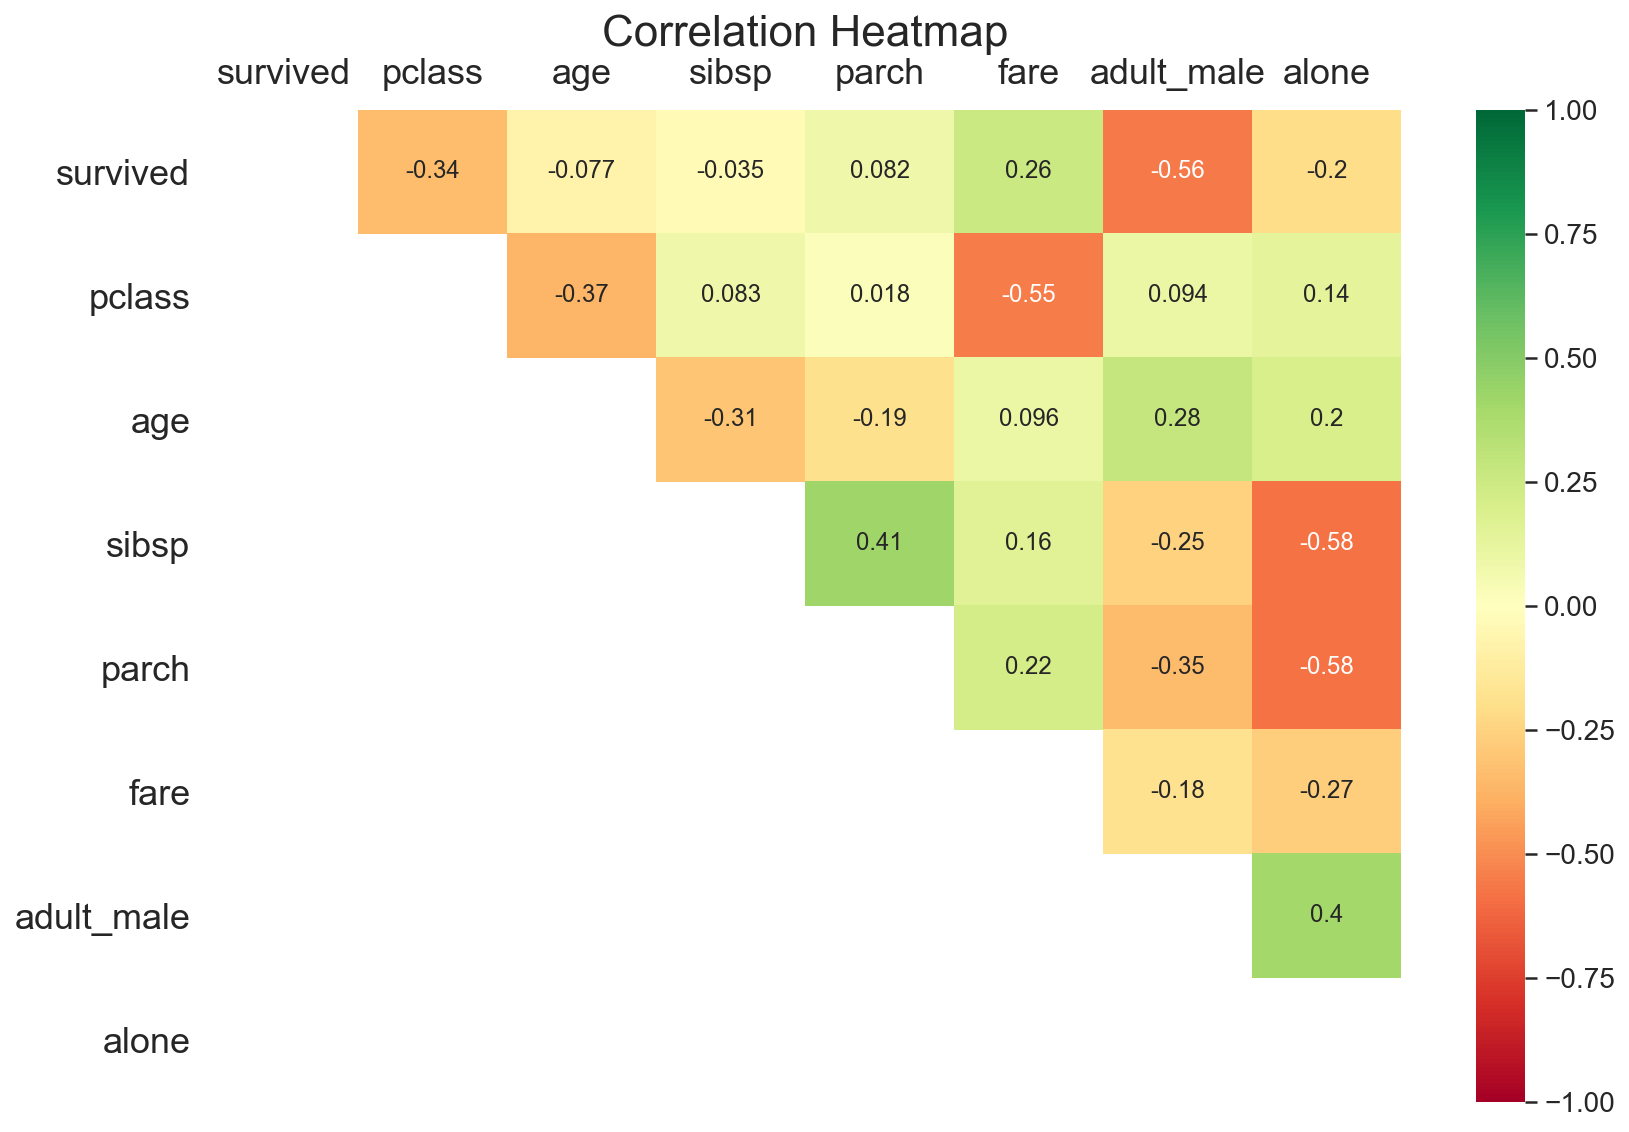

In [8]:
df.bp.plot_corr(xrot=0)

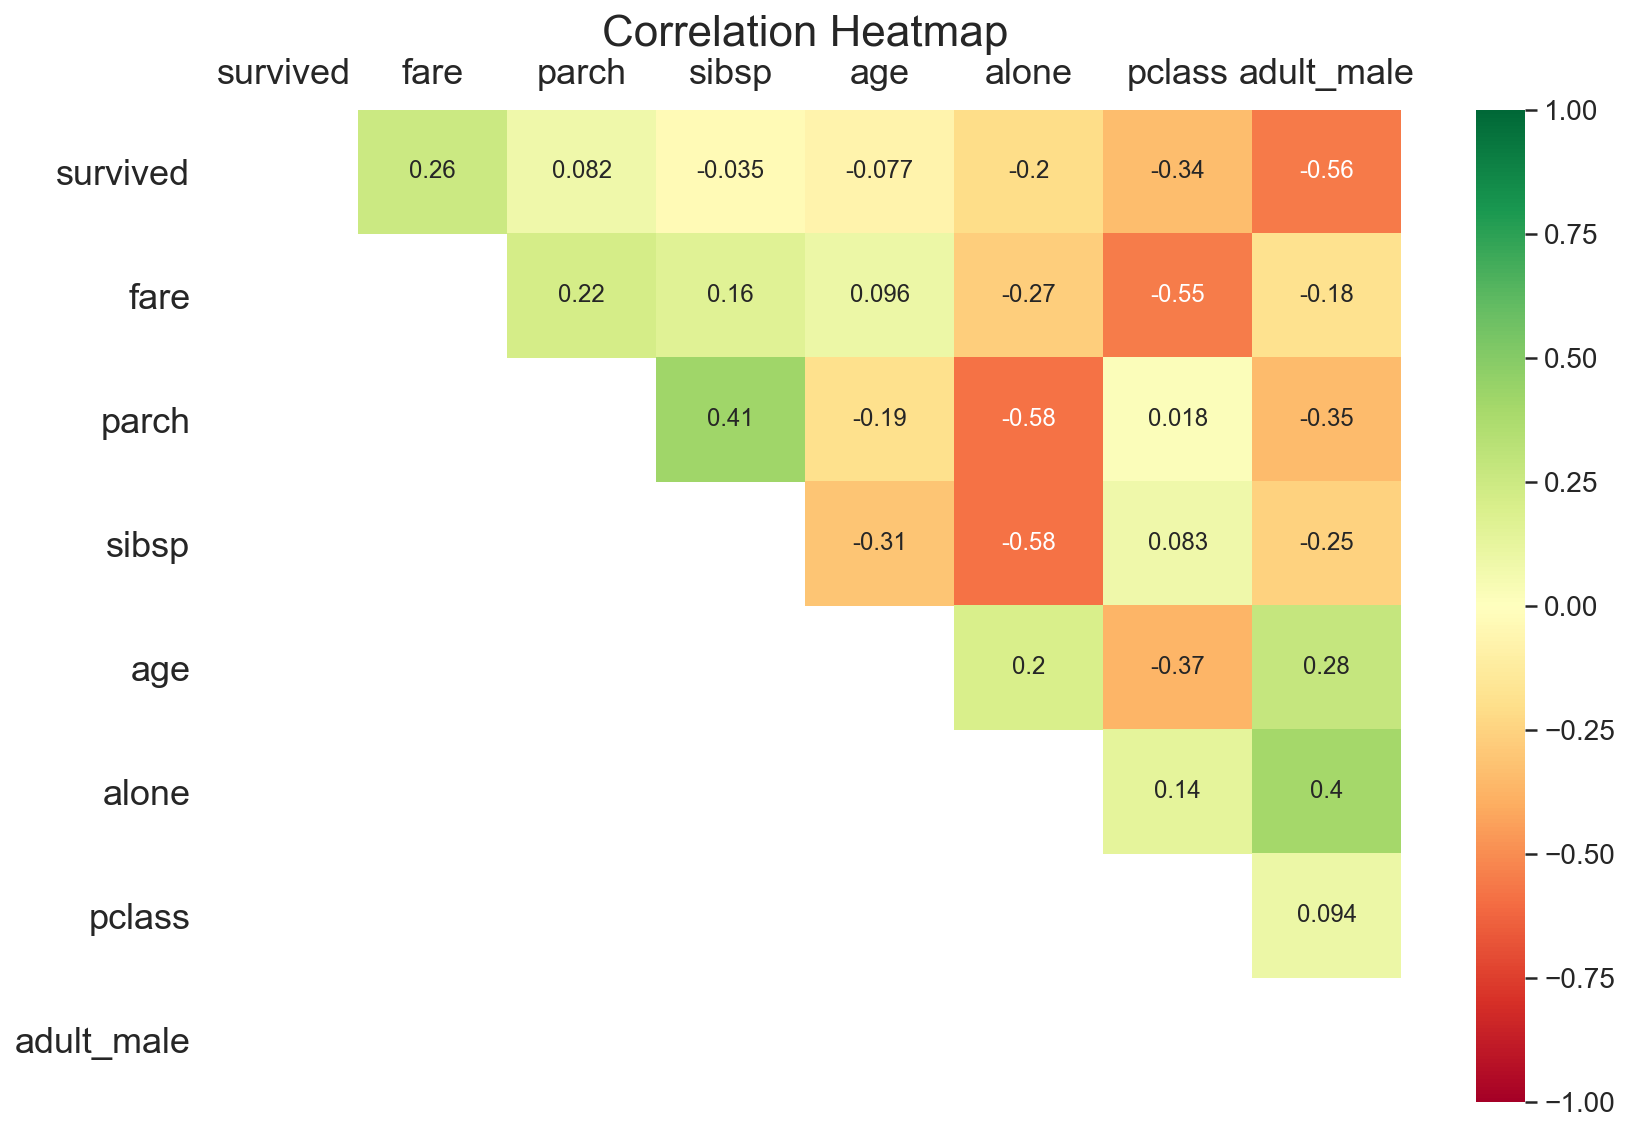

In [9]:
df.bp.plot_corr(target='survived')

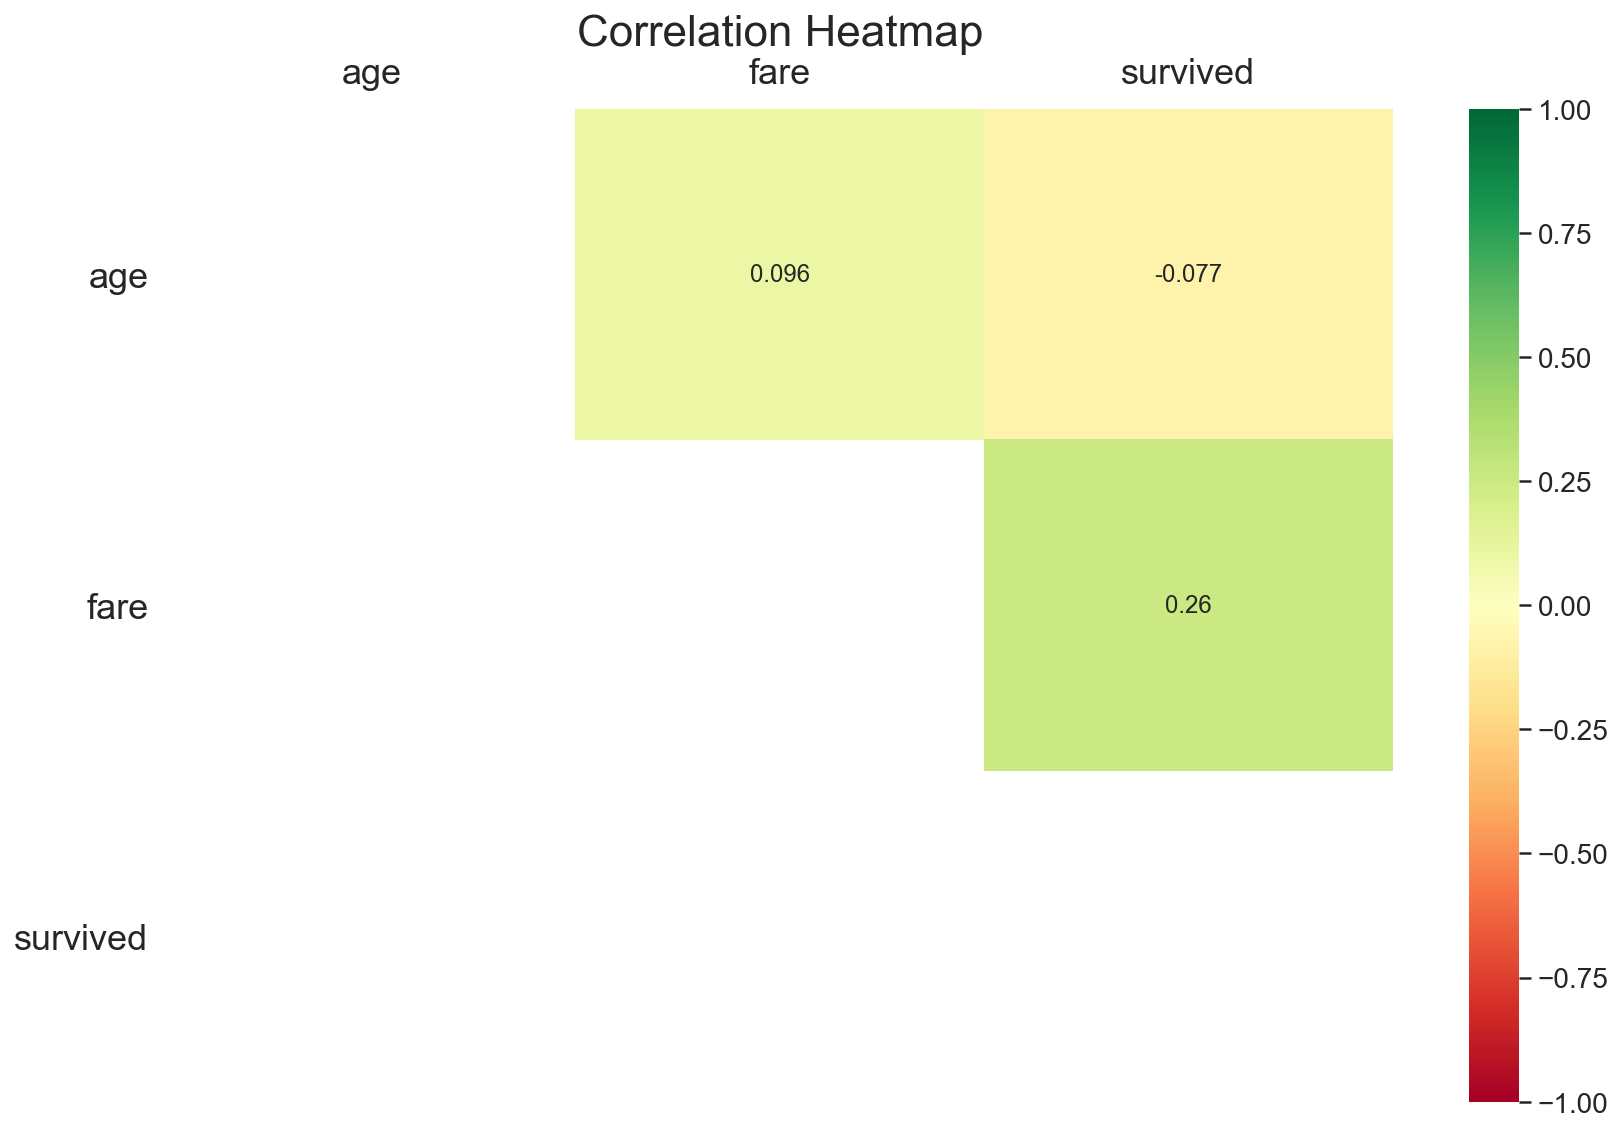

In [10]:
target = 'survived'
df_few_cols = df[['age','fare']]
df_few_cols.merge(df[target],left_index=True,right_index=True)\
           .bp.plot_corr()

In [11]:
df.bp.plot_corr_style()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.00,-0.34,-0.08,-0.04,0.08,0.26,-0.56,-0.20
pclass,-0.34,1.00,-0.37,0.08,0.02,-0.55,0.09,0.14
age,-0.08,-0.37,1.00,-0.31,-0.19,0.10,0.28,0.20
sibsp,-0.04,0.08,-0.31,1.00,0.41,0.16,-0.25,-0.58
parch,0.08,0.02,-0.19,0.41,1.00,0.22,-0.35,-0.58
fare,0.26,-0.55,0.10,0.16,0.22,1.00,-0.18,-0.27
adult_male,-0.56,0.09,0.28,-0.25,-0.35,-0.18,1.00,0.40
alone,-0.20,0.14,0.20,-0.58,-0.58,-0.27,0.40,1.00


In [12]:
# df.bp.plot_corr_sns()

In [13]:
df.corr().style.apply(lambda x: ["background: salmon" if  (abs(v) > 0.5 and v!=1) else "" for v in x], axis = 1)

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


In [23]:
df.bp.corr_high(thr=0.5,disp=True)

cols_high_corr = ['sibsp', 'adult_male', 'survived', 'fare', 'parch', 'alone', 'pclass']
cols_high_corr1 = ['fare', 'survived', 'parch', 'alone']
cols_high_corr2 = ['pclass', 'adult_male', 'alone', 'sibsp']
cols_high_corr_drop = ['fare', 'parch', 'survived']


/Users/poudel/Dropbox/a00_Bhishan_Modules/bhishan/pandas_api.py:33: UserWarning:

registration of accessor <class 'bhishan.pandas_api.BPAccessor'> under name 'bp' for type <class 'pandas.core.frame.DataFrame'> is overriding a preexistingattribute with the same name.



,feature1,feature2,corr
0,fare,pclass,-0.549500
1,survived,adult_male,-0.557080
2,parch,alone,-0.583398
3,alone,sibsp,-0.584471


In [21]:
cols_high_corr_drop = ['fare', 'parch', 'survived']

cols_high_corr_drop = ['fare', 'alone', 'adult_male']


/Users/poudel/Dropbox/a00_Bhishan_Modules/bhishan/pandas_api.py:33: UserWarning:

registration of accessor <class 'bhishan.pandas_api.BPAccessor'> under name 'bp' for type <class 'pandas.core.frame.DataFrame'> is overriding a preexistingattribute with the same name.



In [22]:
df1 = df.drop(cols_high_corr_drop,axis=1)
df1.corr()

,survived,pclass,age,sibsp,parch
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838
parch,0.081629,0.018443,-0.189119,0.414838,1.000000


# Partial Correlation

In [ ]:
df.bp.partial_corr(thr=0.3,disp=True)

In [ ]:
df.bp.partial_corr(['fare','age'])

# Outliers

In [ ]:
ser_outliers = df.bp.outliers_tukey('age')
ser_outliers

In [ ]:
col = 'age'
df1 = df.dropna(subset=[col]).reset_index(drop=True)
idx_outliers, val_outliers = df1.bp.outliers_kde(col)
df1.loc[idx_outliers,[col]]

# Kernel Density

In [ ]:
df.bp.compare_kde('fare','survived')